In [17]:
from autoscraper import AutoScraper
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
pip install autoscraper

In [8]:
flipkart_url = "https://www.flipkart.com/apple-iphone-12-black-128-gb/product-reviews/itmf1f0a58f1ecd7?pid=MOBFWBYZK3HACR72&lid=LSTMOBFWBYZK3HACR72UCPUVA&marketplace=FLIPKART"

wanted_list = ["Best ever delivery by flipkart, got this phone in less than 24hrs, really impressed by the delivery, this is my first ever ios device, and i'm really impressed by its features, camera quality, awesome stereo speaker, oled display is awesome but have some warmth feeling making display little bit yellow, battery backup is awesome."]

In [5]:
scraper = AutoScraper()

In [10]:
result = scraper.build(flipkart_url,wanted_list)
print(result)

['Excellent product worth for every penny, writing this review after using 7 days, earlier was using iPhone 6Plus now on iPhone 12 😍, faster then anything this else.Excellent Picture quality.Just loved it.!!', 'Delightful phone, the phone is just a peice of art, sleek, eye catchy, super fast and got everything u need...best one available', 'iPhone 6S Plus 64GB -> iPhone 12 128GBMy 2nd iPhone, upgraded after 5 years.Gorgeous display, stunning new blue colour, excellent camera, best hardware-software combination, that’s how I would describe iPhone 12 as a package. 😊Even though my previous iPhone had a 5.5” display and this one has 6.1” display, its overall body size is much smaller. Had to get used to it initially 🙂Opening/closing/loading of apps is fast. No issues there. Video playback on this screen looks gorgeous. Took...', 'The best is yet to come, I am really happy with the product was delivered on time by Flipkart, over all liked the colours it’s a dream come to true to finally hav

In [11]:
iphone_review = pd.DataFrame(result,columns=['reviews'])

In [12]:
iphone_review

,reviews
0,"Excellent product worth for every penny, writi..."
1,"Delightful phone, the phone is just a peice of..."
2,iPhone 6S Plus 64GB -> iPhone 12 128GBMy 2nd i...
3,"The best is yet to come, I am really happy wit..."
4,Night mode is simply amazing and give you a cl...
5,It’s my first iPhone ever and I bought it with...
6,Green colour is charming and priceless No w...
7,The Product is fantastic with great nay awesom...
8,"Bought First Apple product, Awesome design and..."
9,"Best ever delivery by flipkart, got this phone..."


In [14]:
#cleaning text
def cleaning(text):
    text = re.sub('@[A-Za-z0-9]+','',text)
    text = text.lower()
    return text

In [15]:
iphone_review['reviews'] = iphone_review['reviews'].apply(cleaning)

In [16]:
iphone_review

,reviews
0,"excellent product worth for every penny, writi..."
1,"delightful phone, the phone is just a peice of..."
2,iphone 6s plus 64gb -> iphone 12 128gbmy 2nd i...
3,"the best is yet to come, i am really happy wit..."
4,night mode is simply amazing and give you a cl...
5,it’s my first iphone ever and i bought it with...
6,green colour is charming and priceless no w...
7,the product is fantastic with great nay awesom...
8,"bought first apple product, awesome design and..."
9,"best ever delivery by flipkart, got this phone..."


In [19]:
stoptext = pd.read_csv('stop.txt', sep=" ", header=None)

In [20]:
lemma = WordNetLemmatizer()

In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
iphone_review['reviews'] = iphone_review['reviews'].apply(lambda x: " ".join([lemma.lemmatize(word) for word in x.split() if word not in (stoptext)]))

In [25]:
iphone_review

,reviews
0,"excellent product worth for every penny, writi..."
1,"delightful phone, the phone is just a peice of..."
2,iphone 6 plus 64gb -> iphone 12 128gbmy 2nd ip...
3,"the best is yet to come, i am really happy wit..."
4,night mode is simply amazing and give you a cl...
5,it’s my first iphone ever and i bought it with...
6,green colour is charming and priceless no weig...
7,the product is fantastic with great nay awesom...
8,"bought first apple product, awesome design and..."
9,"best ever delivery by flipkart, got this phone..."


In [26]:
def Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [27]:
iphone_review['subjectivity'] = iphone_review['reviews'].apply(Subjectivity)
iphone_review['polarity']=iphone_review['reviews'].apply(polarity)

In [28]:
iphone_review

,reviews,subjectivity,polarity
0,"excellent product worth for every penny, writi...",0.600000,0.575000
1,"delightful phone, the phone is just a peice of...",0.666667,0.483333
2,iphone 6 plus 64gb -> iphone 12 128gbmy 2nd ip...,0.418434,0.280808
3,"the best is yet to come, i am really happy wit...",0.750000,0.550000
4,night mode is simply amazing and give you a cl...,0.525000,0.200000
5,it’s my first iphone ever and i bought it with...,0.474815,0.299259
6,green colour is charming and priceless no weig...,0.639192,0.399495
7,the product is fantastic with great nay awesom...,0.821429,0.742857
8,"bought first apple product, awesome design and...",0.597619,0.201786
9,"best ever delivery by flipkart, got this phone...",0.681481,0.673611


In [29]:
def review_type(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [31]:
iphone_review['Review_type']=iphone_review['polarity'].apply(review_type)
iphone_review

,reviews,subjectivity,polarity,Review_type
0,"excellent product worth for every penny, writi...",0.600000,0.575000,positive
1,"delightful phone, the phone is just a peice of...",0.666667,0.483333,positive
2,iphone 6 plus 64gb -> iphone 12 128gbmy 2nd ip...,0.418434,0.280808,positive
3,"the best is yet to come, i am really happy wit...",0.750000,0.550000,positive
4,night mode is simply amazing and give you a cl...,0.525000,0.200000,positive
5,it’s my first iphone ever and i bought it with...,0.474815,0.299259,positive
6,green colour is charming and priceless no weig...,0.639192,0.399495,positive
7,the product is fantastic with great nay awesom...,0.821429,0.742857,positive
8,"bought first apple product, awesome design and...",0.597619,0.201786,positive
9,"best ever delivery by flipkart, got this phone...",0.681481,0.673611,positive


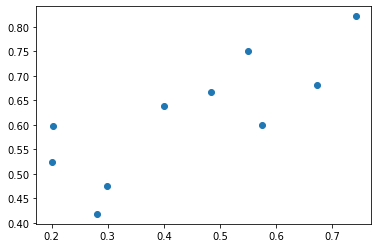

In [32]:
plt.scatter(iphone_review['polarity'],iphone_review['subjectivity'])

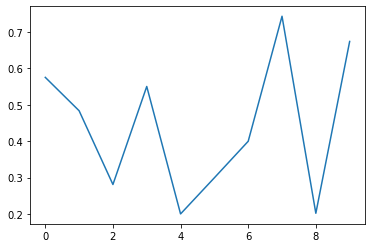

In [33]:
iphone_review["polarity"].plot()

<function matplotlib.pyplot.show>

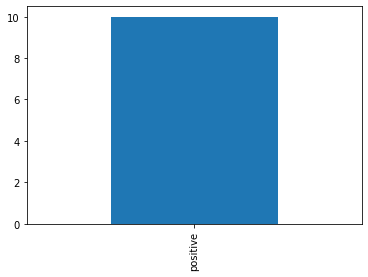

In [35]:
iphone_review['Review_type'].value_counts().plot(kind='bar')
plt.show

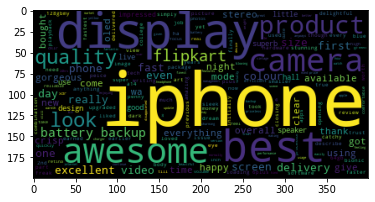

In [36]:
#Word Cloud
words = ' '.join([ txts for txts in iphone_review['reviews']])
wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud)